## Bibliotecas

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sequence import replace_string

## Dataset e Transformações

In [7]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
data['Age'] = data['Age'].astype(int)
data['Height'] = round(data['Height'], 2)
data['Weight'] = round(data['Weight'], 2)

In [9]:
data['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [10]:
data = replace_string.replace_string_to_sequence(data, 'CAEC')

In [11]:
data = replace_string.replace_string_to_sequence(data, 'CALC')

In [12]:
X = data.iloc[:, [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 14]].values
y= data.iloc[:, -1].values

In [13]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,21,1.62,64.0,yes,no,2,no,2.0,no,0.0,1
1,21,1.52,56.0,yes,no,2,yes,3.0,yes,3.0,2
2,23,1.8,77.0,yes,no,2,no,2.0,no,2.0,3
3,27,1.8,87.0,no,no,2,no,2.0,no,2.0,3
4,22,1.78,89.8,no,no,2,no,2.0,no,0.0,2


In [14]:
y

array(['Normal_Weight', 'Normal_Weight', 'Normal_Weight', ...,
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III'],
      dtype=object)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state=0)

In [16]:
lb = LabelEncoder()
for col in [3, 4, 6, 8]:
    X_train[:, col] = lb.fit_transform(X_train[:, col])
    X_test[:, col] = lb.transform(X_test[:, col])

In [17]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,22,1.61,82.47,1,1,2,0,2.371015,0,0.288032,2
1,23,1.85,121.25,1,1,2,0,2.628816,0,0.975384,2
2,22,1.65,80.0,1,1,2,0,2.0,0,0.146919,1
3,23,1.7,75.0,1,1,2,0,2.152666,0,1.078074,2
4,24,1.78,118.74,1,1,2,0,2.045561,0,0.854957,2


In [18]:
pd.DataFrame(X_train).nunique()

0      29
1      46
2     323
3       2
4       2
5       4
6       2
7     261
8       2
9     255
10      3
dtype: int64

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train[:, [0, 1, 2, 7, 9]] = scaler.fit_transform(X_train[:, [0, 1, 2, 7, 9]]) 
X_test[:, [0, 1, 2, 7, 9]] = scaler.transform(X_test[:, [0, 1, 2, 7, 9]]) 

In [20]:
encoder = OneHotEncoder(sparse_output=False)  # Usa uma matriz densa, mais prática na maioria dos casos
y_train = encoder.fit_transform(y_train.reshape(-1, 1)) 
y_test = encoder.transform(y_test.reshape(-1, 1))

In [21]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.171429,0.288462,0.344156,1,1,2,0,0.685507,0,0.096011,2
1,0.2,0.75,0.669519,1,1,2,0,0.814408,0,0.325128,2
2,0.171429,0.365385,0.323433,1,1,2,0,0.5,0,0.048973,1
3,0.2,0.461538,0.281483,1,1,2,0,0.576333,0,0.359358,2
4,0.228571,0.615385,0.64846,1,1,2,0,0.522781,0,0.284986,2


In [22]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.4,0.865385,0.736471,1,1,2,0,0.181292,0,0.381359,2
1,0.057143,0.403846,0.415723,1,1,3,0,0.0,0,0.0,2
2,0.371429,0.596154,0.38275,0,1,2,0,0.137194,0,0.501334,1
3,0.057143,0.557692,0.772716,1,1,2,0,0.961896,0,0.512185,2
4,0.057143,0.557692,0.774813,1,1,2,0,0.934617,0,0.488644,2


In [23]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Redes Neurais

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units= 212 ,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=7, activation='softmax') 
])

In [26]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
X_test = np.array(X_test, dtype=float)
X_train = np.array(X_train, dtype=float)

In [28]:
r = model.fit(X_train, y_train, epochs = 200, batch_size = 20, validation_data=(X_test, y_test))

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1373 - loss: 2.0021 - val_accuracy: 0.2126 - val_loss: 1.9058
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1549 - loss: 1.9455 - val_accuracy: 0.2688 - val_loss: 1.8618
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2131 - loss: 1.8636 - val_accuracy: 0.3955 - val_loss: 1.8272
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2899 - loss: 1.8138 - val_accuracy: 0.4180 - val_loss: 1.7830
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2610 - loss: 1.7999 - val_accuracy: 0.4139 - val_loss: 1.7447
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3378 - loss: 1.7563 - val_accuracy: 0.4435 - val_loss: 1.7076
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3629 - loss: 1.7150 - val_accuracy: 0.4932 - val_loss: 1.6761
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3978 - loss: 1.6676 - val_accuracy: 0.4654 - 

## Resultados

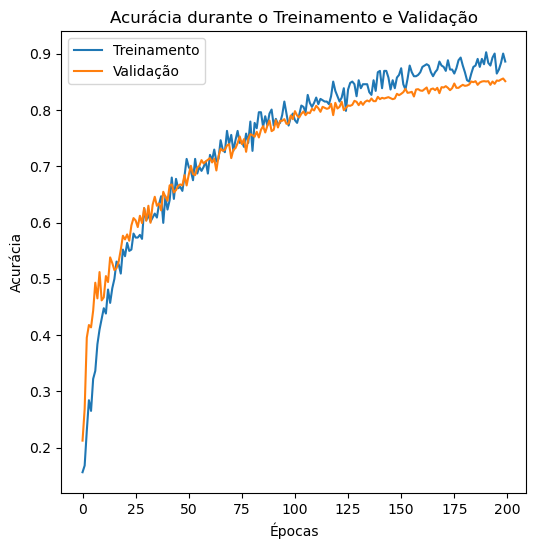

In [30]:
plt.figure(figsize=(6, 6))
plt.plot(r.history['accuracy'], label='Treinamento')
plt.plot(r.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

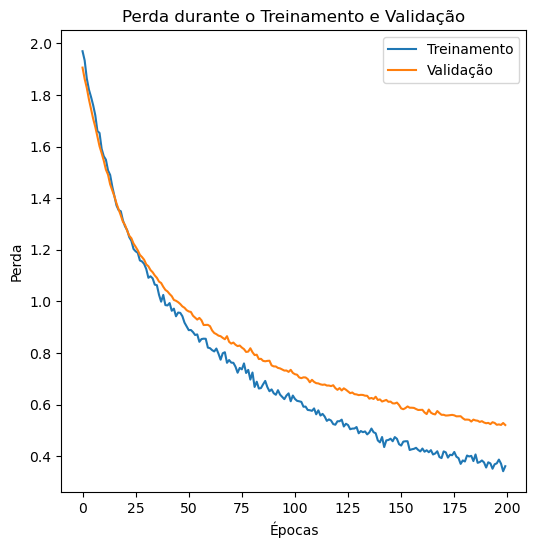

In [31]:
plt.figure(figsize=(6, 6))
plt.plot(r.history['loss'], label='Treinamento')
plt.plot(r.history['val_loss'], label='Validação')
plt.title('Perda durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

In [32]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test = np.argmax(y_test, axis=1)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [33]:
y_test

array([3, 2, 5, ..., 3, 0, 4], dtype=int64)

In [34]:
y_pred

array([3, 2, 5, ..., 3, 0, 4], dtype=int64)

In [35]:
ac = accuracy_score(y_test, y_pred)

In [36]:
y_pred_one_hot = np.eye(7)[y_pred] # Transformação para onehotencoder
predicao_original = encoder.inverse_transform(y_pred_one_hot) #  De volta para string

y_test_one_hot = np.eye(7)[y_test]
real_original = encoder.inverse_transform(y_test_one_hot)

In [37]:
data1 = pd.DataFrame(real_original, columns=['Categoria'])
data2 = pd.DataFrame(y_test_one_hot, columns=['0', '1', '2','3','4','5','6'])

In [38]:
data_combinado = pd.concat([data1, data2], axis=1)
valores_unicos = data_combinado.groupby('Categoria').first()

In [79]:
cores = ['white', 'blue']
custom_cmap = LinearSegmentedColormap.from_list("cores", cores)
tabela_unicos = valores_unicos.style.background_gradient(cmap=custom_cmap)
tabela_unicos

,0,1,2,3,4,5,6
Categoria,,,,,,,
Insufficient_Weight,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Normal_Weight,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Obesity_Type_I,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Obesity_Type_II,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Obesity_Type_III,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Overweight_Level_I,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Overweight_Level_II,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


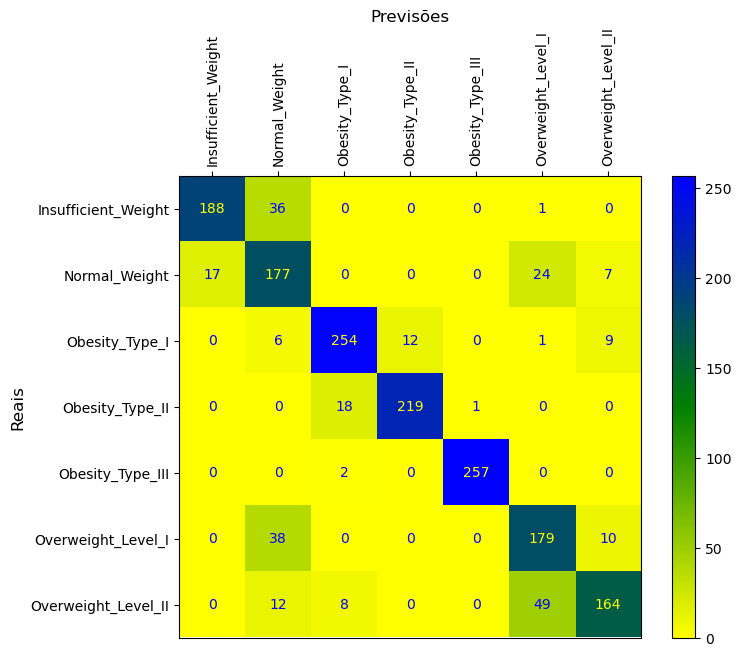

Acurácia: 85.14%


In [75]:
cm = confusion_matrix(y_test, y_pred)

class_names = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

colors = ['yellow', 'green', 'blue']
custom_cmap = LinearSegmentedColormap.from_list("custom_red_yellow_green_blue", colors)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))  
disp.plot(cmap=custom_cmap, values_format='d', ax=ax)

ax.set_xlabel('Previsões', fontsize=12)
ax.set_ylabel('Reais', fontsize=12)

ax.xaxis.set_ticks_position('top')  
ax.xaxis.set_label_position('top')

plt.xticks(rotation=90)

plt.show()

print(f"Acurácia: {ac:.2%}")